In [244]:
from tensorflow import keras

In [245]:
import numpy as np

In [246]:
import pandas as pd

In [247]:
import matplotlib.pyplot as plt
import cv2

In [248]:
import os

In [249]:
imgsize = 150
category_count = 10

pathList = os.listdir('Images')
def GetImagePathByIndex(Ii, Index):
    path = 'Images/' + Ii[Index] + '/'
    ImagePath = os.listdir(path);
    for i in range(len(ImagePath)):
        ImagePath[i] = path + ImagePath[i]
    return ImagePath

def GetXY(ImagePaths):
    train_rate = 9
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for i in range(category_count):
        ImagePathList = GetImagePathByIndex(ImagePaths, i);
        for j in range(len(ImagePathList)):
            img = cv2.imread(ImagePathList[j],cv2.IMREAD_COLOR) 
            img = cv2.resize(img,(imgsize,imgsize))    
            img = img.astype('float32') / 255
            if (j % 10) < train_rate:
                x_train.append(np.array(img))
                y_train.append(ImagePaths[i])
            else:
                x_test.append(np.array(img))
                y_test.append(ImagePaths[i])
    return x_train, y_train, x_test, y_test
        
x_train ,y_train, x_test, y_test  = GetXY(pathList)

In [250]:
def ListMaptoDict(somelist):
    return {somelist[x]:x for x in range(len(somelist))}

dic = ListMaptoDict(pathList)
df_train = pd.DataFrame({'DogName':y_train})
df_test = pd.DataFrame({'DogName':y_test})
df_train.DogName = df_train.DogName.map(dic)
df_test.DogName = df_test.DogName.map(dic)
y_train = np.array(df_train)
y_test = np.array(df_test)

In [251]:
y_train = keras.utils.to_categorical(y_train, category_count)
y_test = keras.utils.to_categorical(y_test, category_count)


x_train = np.array(x_train)
x_test = np.array(x_test)

In [262]:
# Picture Count * 150(width) * 150(height) * 3(RGB)
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=48, kernel_size=(7, 7), strides = 2, input_shape=(imgsize, imgsize, 3)))
model.add(keras.layers.MaxPool2D(pool_size = 3, strides = 2, padding='same'))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides = 4))
model.add(keras.layers.MaxPool2D(pool_size = 3, strides = 2, padding='same'))
model.add(keras.layers.Conv2D(filters=512, kernel_size=(3, 3), strides = 1))
model.add(keras.layers.MaxPool2D(pool_size = 3, strides = 2, padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(category_count, activation='softmax'))

opt = keras.optimizers.Adam(lr=0.00002)
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 72, 72, 48)        7104      
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 36, 36, 48)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 8, 8, 256)         307456    
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 2, 2, 512)         1180160   
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 512)               0         
__________

In [263]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 600, validation_data=(x_test, y_test), verbose=2)

Train on 1732 samples, validate on 187 samples
Epoch 1/600
 - 2s - loss: 53.2304 - acc: 0.1085 - val_loss: 52.9060 - val_acc: 0.1390
Epoch 2/600
 - 1s - loss: 52.6540 - acc: 0.1530 - val_loss: 52.3461 - val_acc: 0.1551
Epoch 3/600
 - 1s - loss: 52.0975 - acc: 0.1588 - val_loss: 51.7931 - val_acc: 0.1711
Epoch 4/600
 - 1s - loss: 51.5459 - acc: 0.1674 - val_loss: 51.2459 - val_acc: 0.1604
Epoch 5/600
 - 1s - loss: 50.9924 - acc: 0.1732 - val_loss: 50.7032 - val_acc: 0.1711
Epoch 6/600
 - 1s - loss: 50.4504 - acc: 0.1773 - val_loss: 50.1661 - val_acc: 0.1818
Epoch 7/600
 - 1s - loss: 49.9144 - acc: 0.1952 - val_loss: 49.6333 - val_acc: 0.1872
Epoch 8/600
 - 1s - loss: 49.3802 - acc: 0.2032 - val_loss: 49.1067 - val_acc: 0.1818
Epoch 9/600
 - 1s - loss: 48.8581 - acc: 0.2050 - val_loss: 48.5851 - val_acc: 0.1872
Epoch 10/600
 - 1s - loss: 48.3254 - acc: 0.2263 - val_loss: 48.0670 - val_acc: 0.1711
Epoch 11/600
 - 1s - loss: 47.8097 - acc: 0.2292 - val_loss: 47.5538 - val_acc: 0.1925
Epoch

Epoch 95/600
 - 1s - loss: 19.1580 - acc: 0.4630 - val_loss: 19.2758 - val_acc: 0.3636
Epoch 96/600
 - 1s - loss: 18.9440 - acc: 0.4567 - val_loss: 19.0670 - val_acc: 0.3476
Epoch 97/600
 - 1s - loss: 18.7470 - acc: 0.4607 - val_loss: 18.8650 - val_acc: 0.3690
Epoch 98/600
 - 1s - loss: 18.5234 - acc: 0.4746 - val_loss: 18.6595 - val_acc: 0.3476
Epoch 99/600
 - 1s - loss: 18.3408 - acc: 0.4550 - val_loss: 18.4647 - val_acc: 0.3636
Epoch 100/600
 - 1s - loss: 18.1107 - acc: 0.4740 - val_loss: 18.2587 - val_acc: 0.3369
Epoch 101/600
 - 1s - loss: 17.9293 - acc: 0.4671 - val_loss: 18.0703 - val_acc: 0.3422
Epoch 102/600
 - 1s - loss: 17.7388 - acc: 0.4665 - val_loss: 17.8661 - val_acc: 0.3316
Epoch 103/600
 - 1s - loss: 17.5312 - acc: 0.4677 - val_loss: 17.6681 - val_acc: 0.3369
Epoch 104/600
 - 1s - loss: 17.3509 - acc: 0.4706 - val_loss: 17.4842 - val_acc: 0.3369
Epoch 105/600
 - 1s - loss: 17.1418 - acc: 0.4729 - val_loss: 17.2917 - val_acc: 0.3476
Epoch 106/600
 - 1s - loss: 16.9547 -

Epoch 189/600
 - 1s - loss: 6.7621 - acc: 0.6051 - val_loss: 7.2600 - val_acc: 0.3743
Epoch 190/600
 - 1s - loss: 6.7007 - acc: 0.6016 - val_loss: 7.1559 - val_acc: 0.4225
Epoch 191/600
 - 1s - loss: 6.6113 - acc: 0.6010 - val_loss: 7.0949 - val_acc: 0.3957
Epoch 192/600
 - 1s - loss: 6.5431 - acc: 0.6126 - val_loss: 7.0154 - val_acc: 0.4011
Epoch 193/600
 - 1s - loss: 6.4750 - acc: 0.6091 - val_loss: 6.9583 - val_acc: 0.4118
Epoch 194/600
 - 1s - loss: 6.4212 - acc: 0.6103 - val_loss: 6.8988 - val_acc: 0.4011
Epoch 195/600
 - 1s - loss: 6.3323 - acc: 0.6178 - val_loss: 6.8505 - val_acc: 0.3743
Epoch 196/600
 - 1s - loss: 6.2814 - acc: 0.6178 - val_loss: 6.7670 - val_acc: 0.4064
Epoch 197/600
 - 1s - loss: 6.1960 - acc: 0.6166 - val_loss: 6.7036 - val_acc: 0.3797
Epoch 198/600
 - 1s - loss: 6.1404 - acc: 0.6149 - val_loss: 6.6779 - val_acc: 0.3957
Epoch 199/600
 - 1s - loss: 6.0642 - acc: 0.6201 - val_loss: 6.5910 - val_acc: 0.4064
Epoch 200/600
 - 1s - loss: 6.0063 - acc: 0.6178 - val

Epoch 285/600
 - 1s - loss: 2.6508 - acc: 0.7881 - val_loss: 3.6620 - val_acc: 0.3957
Epoch 286/600
 - 1s - loss: 2.6318 - acc: 0.7829 - val_loss: 3.6418 - val_acc: 0.4225
Epoch 287/600
 - 1s - loss: 2.6465 - acc: 0.7685 - val_loss: 3.6424 - val_acc: 0.4118
Epoch 288/600
 - 1s - loss: 2.6371 - acc: 0.7581 - val_loss: 3.6455 - val_acc: 0.4064
Epoch 289/600
 - 1s - loss: 2.5902 - acc: 0.7893 - val_loss: 3.6081 - val_acc: 0.4064
Epoch 290/600
 - 1s - loss: 2.5877 - acc: 0.7754 - val_loss: 3.5852 - val_acc: 0.4171
Epoch 291/600
 - 1s - loss: 2.5385 - acc: 0.7875 - val_loss: 3.5558 - val_acc: 0.4385
Epoch 292/600
 - 1s - loss: 2.5158 - acc: 0.7985 - val_loss: 3.5780 - val_acc: 0.3957
Epoch 293/600
 - 1s - loss: 2.5207 - acc: 0.7875 - val_loss: 3.5527 - val_acc: 0.4064
Epoch 294/600
 - 1s - loss: 2.4707 - acc: 0.7898 - val_loss: 3.5260 - val_acc: 0.4064
Epoch 295/600
 - 1s - loss: 2.4744 - acc: 0.7812 - val_loss: 3.5040 - val_acc: 0.4118
Epoch 296/600
 - 1s - loss: 2.4523 - acc: 0.7956 - val

Epoch 381/600
 - 1s - loss: 1.3077 - acc: 0.9203 - val_loss: 2.9025 - val_acc: 0.4171
Epoch 382/600
 - 1s - loss: 1.2927 - acc: 0.9324 - val_loss: 2.9212 - val_acc: 0.3957
Epoch 383/600
 - 1s - loss: 1.3073 - acc: 0.9221 - val_loss: 2.8994 - val_acc: 0.4225
Epoch 384/600
 - 1s - loss: 1.2740 - acc: 0.9284 - val_loss: 2.8885 - val_acc: 0.4225
Epoch 385/600
 - 1s - loss: 1.2601 - acc: 0.9348 - val_loss: 2.8933 - val_acc: 0.4171
Epoch 386/600
 - 1s - loss: 1.2610 - acc: 0.9307 - val_loss: 2.9282 - val_acc: 0.4332
Epoch 387/600
 - 1s - loss: 1.2357 - acc: 0.9394 - val_loss: 2.9186 - val_acc: 0.4118
Epoch 388/600
 - 1s - loss: 1.2492 - acc: 0.9255 - val_loss: 2.9274 - val_acc: 0.4064
Epoch 389/600
 - 1s - loss: 1.2368 - acc: 0.9400 - val_loss: 2.8942 - val_acc: 0.4492
Epoch 390/600
 - 1s - loss: 1.2180 - acc: 0.9371 - val_loss: 2.9185 - val_acc: 0.4332
Epoch 391/600
 - 1s - loss: 1.2119 - acc: 0.9394 - val_loss: 2.8818 - val_acc: 0.4011
Epoch 392/600
 - 1s - loss: 1.2020 - acc: 0.9469 - val

Epoch 477/600
 - 1s - loss: 0.7270 - acc: 0.9838 - val_loss: 2.7426 - val_acc: 0.3957
Epoch 478/600
 - 1s - loss: 0.7144 - acc: 0.9838 - val_loss: 2.7319 - val_acc: 0.4225
Epoch 479/600
 - 1s - loss: 0.7111 - acc: 0.9844 - val_loss: 2.7485 - val_acc: 0.4064
Epoch 480/600
 - 1s - loss: 0.7009 - acc: 0.9873 - val_loss: 2.7391 - val_acc: 0.4118
Epoch 481/600
 - 1s - loss: 0.7067 - acc: 0.9844 - val_loss: 2.7117 - val_acc: 0.4011
Epoch 482/600
 - 1s - loss: 0.6875 - acc: 0.9867 - val_loss: 2.7127 - val_acc: 0.4225
Epoch 483/600
 - 1s - loss: 0.6876 - acc: 0.9861 - val_loss: 2.7415 - val_acc: 0.3957
Epoch 484/600
 - 1s - loss: 0.6804 - acc: 0.9908 - val_loss: 2.7796 - val_acc: 0.4278
Epoch 485/600
 - 1s - loss: 0.6845 - acc: 0.9861 - val_loss: 2.7470 - val_acc: 0.4171
Epoch 486/600
 - 1s - loss: 0.6864 - acc: 0.9856 - val_loss: 2.7146 - val_acc: 0.4118
Epoch 487/600
 - 1s - loss: 0.6856 - acc: 0.9833 - val_loss: 2.7423 - val_acc: 0.4118
Epoch 488/600
 - 1s - loss: 0.6749 - acc: 0.9856 - val

Epoch 573/600
 - 1s - loss: 0.4214 - acc: 0.9942 - val_loss: 2.6955 - val_acc: 0.4225
Epoch 574/600
 - 1s - loss: 0.4200 - acc: 0.9948 - val_loss: 2.7124 - val_acc: 0.4278
Epoch 575/600
 - 1s - loss: 0.4202 - acc: 0.9936 - val_loss: 2.7181 - val_acc: 0.3797
Epoch 576/600
 - 1s - loss: 0.4128 - acc: 0.9954 - val_loss: 2.7167 - val_acc: 0.4118
Epoch 577/600
 - 1s - loss: 0.4148 - acc: 0.9948 - val_loss: 2.6783 - val_acc: 0.4064
Epoch 578/600
 - 1s - loss: 0.4068 - acc: 0.9971 - val_loss: 2.7382 - val_acc: 0.4118
Epoch 579/600
 - 1s - loss: 0.4085 - acc: 0.9971 - val_loss: 2.6983 - val_acc: 0.4064
Epoch 580/600
 - 1s - loss: 0.4123 - acc: 0.9925 - val_loss: 2.7040 - val_acc: 0.4064
Epoch 581/600
 - 1s - loss: 0.4082 - acc: 0.9954 - val_loss: 2.7104 - val_acc: 0.3850
Epoch 582/600
 - 1s - loss: 0.4035 - acc: 0.9965 - val_loss: 2.7155 - val_acc: 0.4118
Epoch 583/600
 - 1s - loss: 0.4019 - acc: 0.9954 - val_loss: 2.6793 - val_acc: 0.4118
Epoch 584/600
 - 1s - loss: 0.3936 - acc: 0.9960 - val

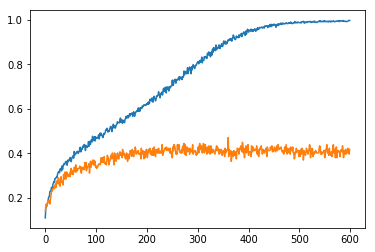

In [264]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.show()

In [265]:
pred = model.predict(x_test)

In [266]:
def GetGraphList(predictions, y_data):
    start = 0
    pList = []
    yList = []
    for i in range(len(y_data)):
        pList.append(np.argmax(predictions[start+i]))
        yList.append(np.argmax(y_data[start+i]))  
    return pList, yList

pList ,yList = GetGraphList(pred, y_test)

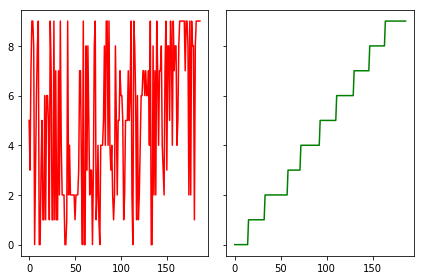

In [272]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].plot(pList, color='red')
axs[1].plot(yList, color='green')

plt.show()

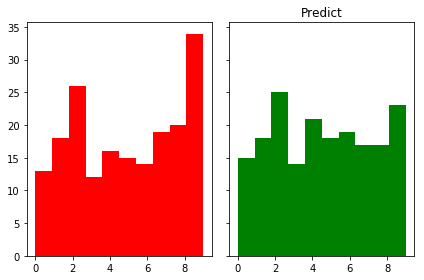

In [273]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(pList, color='red')
axs[1].hist(yList, color='green')
plt.title('Predict')

plt.show()